In [61]:
# Import all necessary libraries.
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [62]:
# generate 2 class dataset
x, y = make_classification(n_samples=10000, n_classes=2, weights=[0.9,0.5],
random_state=42)
# Split data into train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8)

In [63]:
#k-NN
knc = KNeighborsClassifier()
parameters = [{'n_neighbors' :[ 1 , 2, 3, 4, 5, 10, 15, 20 ], 'weights':('uniform', 'distance')}]
clf = GridSearchCV(knc, parameters, cv=5, verbose=3, n_jobs=-1)

clf.fit(x_train,y_train)
print(clf.best_params_)
print(clf.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.4s


{'n_neighbors': 20, 'weights': 'distance'}
0.873


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    4.6s finished


In [64]:
#GaussianNB
clf1 = GaussianNB()
clf1.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [65]:
#LogisticRegression
clf2 = LogisticRegression()
clf2.fit(x_train,y_train)

C:\Users\Anabel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

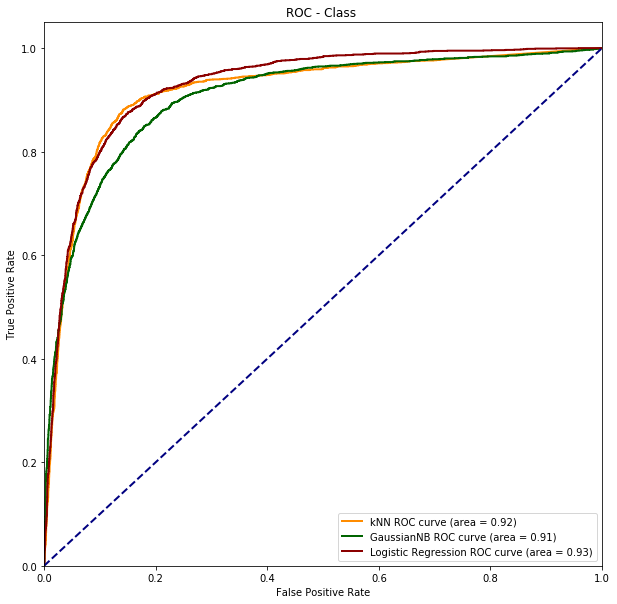

In [66]:
# Getting the probabilities for each class.
y_prob = clf.predict_proba(x_test)
y_prob1 = clf1.predict_proba(x_test)
y_prob2 = clf2.predict_proba(x_test)

# Compute ROC curve and ROC area for each class.
plt.figure(figsize=(10, 10))

fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
fpr1, tpr1, _ = roc_curve(y_test, y_prob1[:, 1])
fpr2, tpr2, _ = roc_curve(y_test, y_prob2[:, 1])
roc_auc = auc(fpr, tpr)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)

# Plotting ROC curve.
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='kNN ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr1, tpr1, color='darkgreen', lw=lw, label='GaussianNB ROC curve (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='darkred', lw=lw, label='Logistic Regression ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Class ')
plt.legend(loc="lower right")

plt.savefig('roc.png', dpi=600)
plt.show()

## O classificador Logistic Regression apresenta o melhor performance